In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [364]:
#Loading the dataset
df = pd.read_csv('laptops.csv')

df.head()

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16,Windows 11 Operating System,512,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8,64 bit Windows 11 Operating System,256,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8,Windows 11 Operating System,512,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8,64 bit Windows 11 Operating System,512,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4,DOS Operating System,256,14.0,3.8,18.0,3.0


In [365]:
df.shape

(984, 12)

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        984 non-null    int64  
 1   img_link          984 non-null    object 
 2   name              984 non-null    object 
 3   price(in Rs.)     984 non-null    int64  
 4   processor         984 non-null    object 
 5   ram               984 non-null    int64  
 6   os                984 non-null    object 
 7   storage           984 non-null    int64  
 8   display(in inch)  984 non-null    float64
 9   rating            688 non-null    float64
 10  no_of_ratings     688 non-null    float64
 11  no_of_reviews     688 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 92.4+ KB


In [367]:
df.describe()

,Unnamed: 0,price(in Rs.),ram,storage,display(in inch),rating,no_of_ratings,no_of_reviews
count,984.000000,984.000000,984.000000,984.000000,984.000000,688.000000,688.000000,688.000000
mean,491.500000,80960.720528,11.577236,572.967480,15.148374,4.284884,718.091570,83.898256
std,284.200633,57421.220919,5.712698,308.607543,1.332078,0.330239,1750.817825,211.596726
min,0.000000,15990.000000,4.000000,128.000000,11.600000,1.600000,1.000000,0.000000
25%,245.750000,42655.000000,8.000000,512.000000,14.000000,4.100000,14.000000,2.000000
50%,491.500000,62990.000000,8.000000,512.000000,15.600000,4.300000,90.000000,11.000000
75%,737.250000,94990.000000,16.000000,512.000000,15.600000,4.500000,453.000000,53.500000
max,983.000000,419990.000000,32.000000,4000.000000,35.000000,5.000000,15492.000000,2054.000000


In [368]:
df.drop(['os','img_link','name','processor'],axis=1,inplace=True)

In [369]:
df.fillna(df.median(), inplace=True)

In [370]:
df.isnull().sum()
df.shape

(984, 8)

Text(0.5, 1.0, 'Price data distribution')

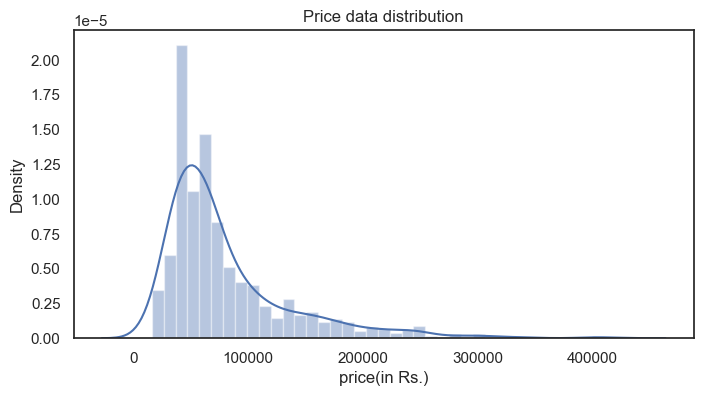

In [371]:
fig=plt.figure(figsize=(8,4))
sns.distplot(df['price(in Rs.)'])
plt.title('Price data distribution')

<Axes: >

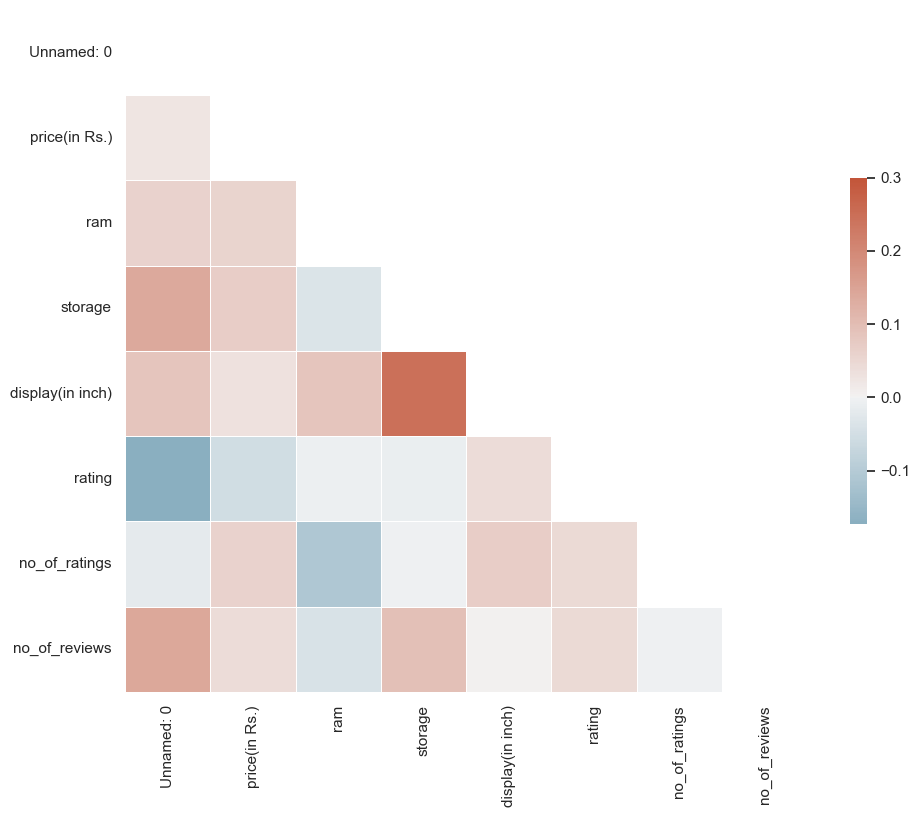

In [372]:
sns.set_theme(style="white")
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 8)),
                 columns=list(df))
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [373]:
y=df['price(in Rs.)']
y.head()

0    62990
1    37500
2    49990
3    33990
4    18990
Name: price(in Rs.), dtype: int64

 0   Unnamed: 0        984 non-null    int64  
 1   img_link          984 non-null    object 
 2   name              984 non-null    object 
 3   price(in Rs.)     984 non-null    int64  
 4   processor         984 non-null    object 
 5   ram               984 non-null    object 
 6   os                984 non-null    object 
 7   storage           984 non-null    object 
 8   display(in inch)  984 non-null    float64
 9   rating            688 non-null    float64
 10  no_of_ratings     688 non-null    float64
 11  no_of_reviews     688 non-null    float64

In [374]:
X=df.drop(['price(in Rs.)'],axis=1)
X.head()

,Unnamed: 0,ram,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,16,512,15.6,4.5,14.0,1.0
1,1,8,256,15.6,4.4,53.0,3.0
2,2,8,512,15.6,4.4,4733.0,463.0
3,3,8,512,15.6,4.3,10406.0,1040.0
4,4,4,256,14.0,3.8,18.0,3.0


In [375]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [376]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        984 non-null    int64  
 1   price(in Rs.)     984 non-null    int64  
 2   ram               984 non-null    int64  
 3   storage           984 non-null    int64  
 4   display(in inch)  984 non-null    float64
 5   rating            984 non-null    float64
 6   no_of_ratings     984 non-null    float64
 7   no_of_reviews     984 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 61.6 KB


,Unnamed: 0,price(in Rs.),ram,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,62990,16,512,15.6,4.5,14.0,1.0
1,1,37500,8,256,15.6,4.4,53.0,3.0
2,2,49990,8,512,15.6,4.4,4733.0,463.0
3,3,33990,8,512,15.6,4.3,10406.0,1040.0
4,4,18990,4,256,14.0,3.8,18.0,3.0


In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [378]:
random_forest_regressor=RandomForestRegressor()
random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [379]:
train_acc=random_forest_regressor.score(X_train,y_train)
test_acc=random_forest_regressor.score(X_test,y_test)
print('Training Accuracy: ',round(train_acc*100, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')

Training Accuracy:  96.36 %
Testing Accuracy:  73.04 %


In [380]:
predictions=random_forest_regressor.predict(X_test)
predictions

array([ 64358.79,  79274.48,  37993.38, 107984.59,  69742.26,  95046.78,
       130679.51,  41764.18,  55703.69, 137767.3 ,  53324.61, 170151.52,
        95943.64,  66254.48,  67792.49,  23358.8 ,  45144.81,  55972.87,
       132871.69, 228732.81, 246180.  ,  37656.59,  53020.59, 103610.91,
        81148.98,  75754.45,  53242.12,  95285.  ,  52905.  , 230188.3 ,
       155172.88,  36386.13,  60074.  ,  59713.  ,  56018.41,  64680.09,
        59455.75, 115842.61,  47952.41, 101369.65,  45098.  ,  38590.08,
        62290.  ,  55724.9 ,  64236.83, 155206.13,  56018.41, 103080.34,
       102211.5 ,  37612.5 ,  25051.71,  70377.45,  34927.18,  91768.29,
        35898.89,  78941.64, 109385.6 , 185916.9 ,  28101.63,  56593.1 ,
        78019.27,  47527.28,  55874.  , 252460.63,  50986.27, 167732.76,
        36790.2 , 102031.34,  64704.2 ,  67799.3 ,  68346.98,  49555.76,
        58735.89,  76303.2 ,  57250.96,  42567.9 ,  81420.52,  61519.68,
        47824.7 , 182618.69,  95886.59, 101735.  , 

<Axes: xlabel='price(in Rs.)', ylabel='Density'>

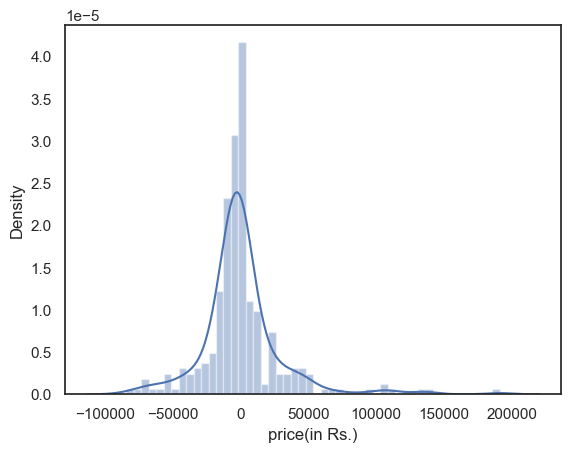

In [381]:
sns.distplot(y_test-predictions)

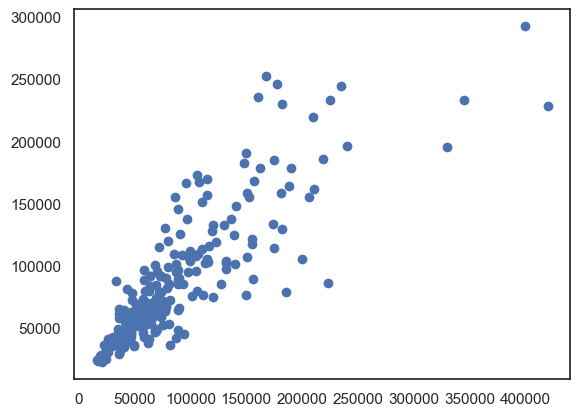

In [382]:
plt.scatter(y_test,predictions)